In [18]:
import pandas as pd
data = pd.read_csv('../data/tfidf_data_model_annotations_liwc_h.csv')
data.head(1)
X = data.drop(columns='model_unanimous', axis=1)
y = data['model_unanimous']

# Scaling

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X)

array([[-1.        ,  0.        ,  0.        , ...,  0.        ,
         1.83940397, 12.5       ],
       [-0.99984223,  0.        ,  0.        , ...,  0.96486486,
         0.26269316,  0.        ],
       [-0.99968447,  0.        ,  0.        , ...,  0.79459459,
        -0.10816777,  0.        ],
       ...,
       [ 0.99968447,  0.        ,  0.        , ...,  0.        ,
        -0.07119205,  0.        ],
       [ 0.99984223,  0.        ,  0.        , ...,  0.        ,
         0.11479029,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  1.68918919,
         0.45971302,  0.        ]])

# Clustering

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto", init='k-means++')
predictions = kmeans.fit_predict(X)



In [21]:
X['predicted_clusters'] = predictions
X['model_unanimous'] = data['model_unanimous']

cluster_label_distribution = X.groupby('predicted_clusters')['model_unanimous'].value_counts().unstack(fill_value=0)

print(cluster_label_distribution)


model_unanimous       PO   PP    UN
predicted_clusters                 
0                   2480  301  1444
1                   2214  295  1722
2                   2297  338  1587


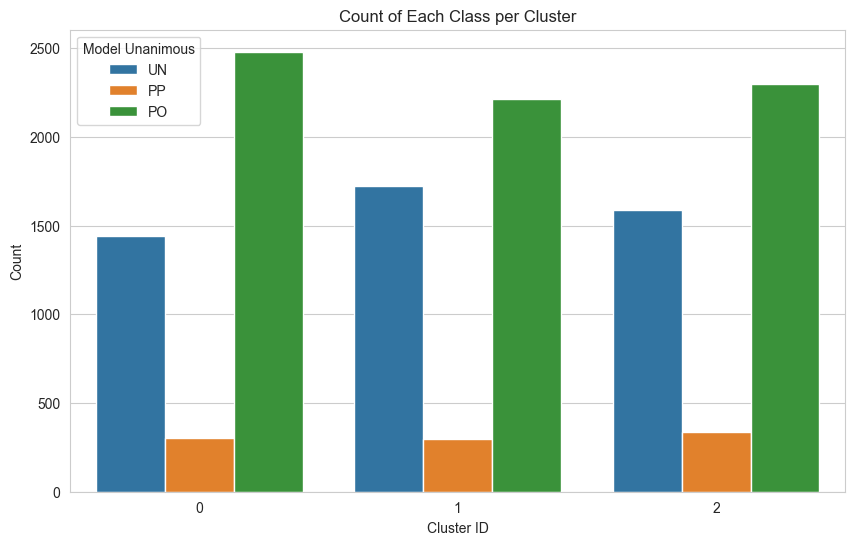

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_clusters', hue='model_unanimous', data=X)
plt.title('Count of Each Class per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.legend(title='Model Unanimous')
plt.show()
